In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize
from scipy.interpolate import interp1d
from scipy.signal import hilbert
from scipy import signal
import nrutils
from nrutils.core.nrsc import *
from nrutils import scsearch,gwylm, simdir2scentry
from nrutils.core import basics

(positive)>> Applying custom matplotlib settings.


## Fourier transform and nrutils

#### checked:
#### fft done using the numpy fft package and the "*.fd_y" method gives the same results;
#### Going to CoP frame + FT = FT+ Going to CoP frame

## Taking the Fourier transform of the time domain symmetrized waveform, and then adding the asymmetry calculated in the frequency domain, reproduces the frequency domain 22 and 2-2 waveforms quite accurately and ifft gives back time domain 22 and 2-2 well

## Nrutils Coprecessing frame transformation introduces some numerical error in the asymmetry, due to the amplitude of the asymmetry being comparable to the noise in raw data

In [102]:
psi22 = np.loadtxt("/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/chinmay_precessingRuns/q2_a10_a27_ph0_th90/Psi4ModeDecomp/psi3col.r5.l5.l2.m2.gz")
psi2m2 = np.loadtxt("/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/chinmay_precessingRuns/q2_a10_a27_ph0_th90/Psi4ModeDecomp/psi3col.r5.l5.l2.m-2.gz")
psi21 = np.loadtxt("/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/chinmay_precessingRuns/q2_a10_a27_ph0_th90/Psi4ModeDecomp/psi3col.r5.l5.l2.m1.gz")
psi2m1 = np.loadtxt("/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/chinmay_precessingRuns/q2_a10_a27_ph0_th90/Psi4ModeDecomp/psi3col.r5.l5.l2.m-1.gz")
psi20 = np.loadtxt("/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/chinmay_precessingRuns/q2_a10_a27_ph0_th90/Psi4ModeDecomp/psi3col.r5.l5.l2.m0.gz")

In [103]:
psi22_90 = np.loadtxt("/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/chinmay_precessingRuns/q2_a10_a27_ph90_th90/Psi4ModeDecomp/psi3col.r5.l5.l2.m2.gz")
psi2m2_90 = np.loadtxt("/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/chinmay_precessingRuns/q2_a10_a27_ph90_th90/Psi4ModeDecomp/psi3col.r5.l5.l2.m-2.gz")

In [104]:
asymmetry0 = 0.5*(psi22[:,1]+1j*psi22[:,2]-np.conj(psi2m2[:,1]+1j*psi2m2[:,2]))
asymmetry90 = 0.5*(psi22_90[:,1]+1j*psi22_90[:,2]-np.conj(psi2m2_90[:,1]+1j*psi2m2_90[:,2]))

### Psi4 asymmetry calculated in inertial frame, cleaned, fed into ylm object, transformed to coP frame

In [7]:
AA = scsearch(institute='bam',keyword='q2_a10_a27_ph',verbose=True)

(scsearch)>> Found institute (=bam) keyword.
(scsearch)>> Found keyword (=q2_a10_a27_ph) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 7 possibly degenerate simulations:
[0001][hogshead] chinmay_precessingRuns: 1chi0.70-p-q2.00	(q2_a10_a27_ph180_th90)
[0002][hogshead] chinmay_precessingRuns: 1chi0.70-p-q2.00	(q2_a10_a27_ph90_th90)
[0003][hogshead] chinmay_precessingRuns: 1chi0.70-p-q2.00	(q2_a10_a27_ph0_th90)
[0004][hogshead] chinmay_precessingRuns: 1chi0.70-p-q2.00	(q2_a10_a27_ph0_th90)
[0005][hogshead] chinmay_precessingRuns: 1chi0.70-p-q2.00	(q2_a10_a27_ph270_th90)
[0006][hogshead] chinmay_precessingRuns: 1chi0.70-p-q2.00	(q2_a10_a27_ph180_th90)
[0007][hogshead] chinmay_precessingRuns: 1chi0.70-p-q2.00	(q2_a10_a27_ph90_th90)



In [10]:
ylm27_0=gwylm(AA[3], lmax=2, verbose=False, clean=True, dt=0.5,pad=2000)
ylm27_90=gwylm(AA[1], lmax=2, verbose=False, clean=True, dt=0.5,pad=2000)
ylm27_180=gwylm(AA[0], lmax=2, verbose=False, clean=True, dt=0.5,pad=2000)
ylm27_270=gwylm(AA[4], lmax=2, verbose=False, clean=True, dt=0.5,pad=2000)

In [11]:
ylm27_0_co = ylm27_0.__calc_coprecessing_frame__(transform_domain='td')
ylm27_90_co = ylm27_90.__calc_coprecessing_frame__(transform_domain='td')
ylm27_180_co = ylm27_180.__calc_coprecessing_frame__(transform_domain='td')
ylm27_270_co = ylm27_270.__calc_coprecessing_frame__(transform_domain='td')

len(domain_vals) =  11258
index_ref =  1
Z_ref =  0.0
ref_orientation =  [0.66716107 0.         0.56903014]
len(domain_vals) =  11258
index_ref =  5680
Z_ref =  -0.399797616091263
ref_orientation =  [0.66716107 0.         0.56903014]
(calc_coprecessing_angles!)>> Reference orientation and calculated data inconsistent. We will reflect.
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This includes radiated and remnant quantities.
len(domain_vals) =  11096
index_ref =  1
Z_ref =  0.0
ref_orientation =  [ 2.92772917e-01 -2.68290400e-09  8.26549487e-01]
len(domain_vals) =  11096
index_ref =  5598
Z_ref =  0.924619670909334
ref_orientation =  [ 2.92772917e-01 -2.68290400e-09  8.26549487e-01]
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This incl

In [13]:
kind = 'strain'
asym27_0_td = 0.5*(ylm27_0[2,2][kind].y-np.conj(ylm27_0[2,-2][kind].y))
asym27_90_td = 0.5*(ylm27_90[2,2][kind].y-np.conj(ylm27_90[2,-2][kind].y))
asym27_0_td_co = 0.5*(ylm27_0_co[2,2][kind].y-np.conj(ylm27_0_co[2,-2][kind].y))
asym27_90_td_co = 0.5*(ylm27_90_co[2,2][kind].y-np.conj(ylm27_90_co[2,-2][kind].y))

asym27_180_td = 0.5*(ylm27_180_co[2,2][kind].y-np.conj(ylm27_180_co[2,-2][kind].y))
asym27_270_td = 0.5*(ylm27_270_co[2,2][kind].y-np.conj(ylm27_270_co[2,-2][kind].y))
asym27_180_td_co = 0.5*(ylm27_180_co[2,2][kind].y-np.conj(ylm27_180_co[2,-2][kind].y))
asym27_270_td_co = 0.5*(ylm27_270_co[2,2][kind].y-np.conj(ylm27_270_co[2,-2][kind].y))

In [14]:
asym27_0_td_clean = signal.savgol_filter(asym27_0_td.real,191,4)+1j*signal.savgol_filter(np.imag(asym27_0_td),191,4)
asym27_90_td_clean = signal.savgol_filter(asym27_90_td.real,191,4)+1j*signal.savgol_filter(np.imag(asym27_90_td),191,4)

### Psi4 from raw data fed into ylm object, transformed to coP frame
### Psi4 asymmetry from raw data fed into ylm object, transformed to coP frame

In [23]:
y2 = ylm27_0.copy()
for kind in y2[2,2]:
#     yy = 0.5 * (  y2[2,2]['psi4'].y - y2[2,-2]['psi4'].y.conj()  )
    wfarr2m2 = np.array( [ psi2m2[:,0], psi2m2[:,1], psi2m2[:,2] ] ).T
    wfarr2m1 = np.array( [ psi2m1[:,0], psi2m1[:,1], psi2m1[:,2] ] ).T
    wfarr20 = np.array( [ psi20[:,0], psi20[:,1], psi20[:,2] ] ).T
    wfarr21 = np.array( [ psi21[:,0], psi21[:,1], psi21[:,2] ] ).T
    wfarr22 = np.array( [ psi22[:,0], psi22[:,1], psi22[:,2] ] ).T
    y2[2,2][kind].setfields(wfarr22)
    y2[2,-2][kind].setfields(wfarr2m2)
    y2[2,1][kind].setfields(wfarr21)
    y2[2,-1][kind].setfields(wfarr2m1)
    y2[2,0][kind].setfields(wfarr20)
    
    
for lm in y2.lm:
    l,m = lm
    if (l,abs(m)) != (2,2):
        for kind in y2.lm[lm]:
            wfarr = y2[lm][kind].wfarr
            wfarr[:,1:] *= 1e-10
            #cleaning symmetrized waveform
            y2[lm][kind].setfields( wfarr )
            #cleaning raw waveform
#             y3[lm][kind].setfields( wfarr )

maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909
maxdt = 0.599999999999909


In [24]:
y2_co = y2.__calc_coprecessing_frame__(transform_domain='td')

IndexError: index 7580 is out of bounds for axis 0 with size 7580

NameError: name 'y2_co' is not defined

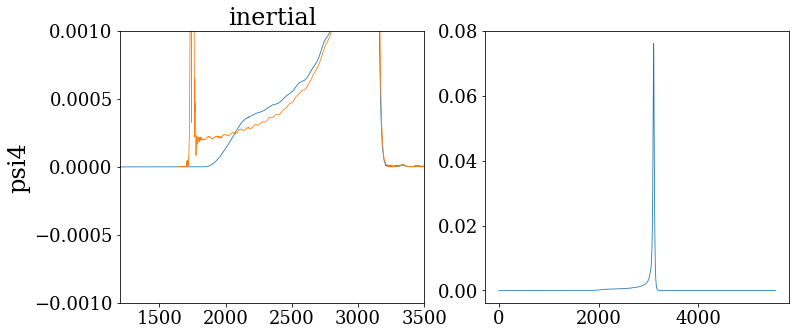

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(ylm27_90[2,2]['psi4'].t,np.abs(ylm27_90[2,2]['psi4'].y))
plt.plot(y2[2,2]['strain'].t+1642,np.abs(y2[2,2]['strain'].y))
plt.xlim(1200,3500)
plt.ylim(-0.001,0.001)
plt.ylabel("psi4")
plt.title("inertial")

plt.subplot(1,2,2)
plt.plot(ylm27_90_co[2,2]['psi4'].t,np.abs(ylm27_90_co[2,2]['psi4'].y))
plt.plot(y2_co[2,2]['strain'].t+1642,np.abs(y2_co[2,2]['strain'].y))
plt.xlim(1200,3500)
plt.ylim(-0.001,0.001)
plt.title("coprecessing")

## Drift in simulation shows up in frequency domain....low frequency peak, similar effect to increasing angle theta of simulation.

In [121]:
S1 = simdir2scentry('/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/q1/q1_a1m08_a2p08_RS_10_T_80_340_trial1/',verbose=True)
S2 = simdir2scentry('/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/q1/q1_a1m08_a2p08_RS_100_T_80_340/',verbose=True)
S3 = simdir2scentry('/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/chinmay_precessingRuns/q1_a1m08_a2p08_RS_0/',verbose=True)
S4 = simdir2scentry('/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/q1/q1_a1m08_a2p08_RS_10_T_80_340_trial2/',verbose=True)
S5 = simdir2scentry('/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/q1/q1_a1m08_a2p08_RS_10_T_80_340/',verbose=True)
S6 = simdir2scentry('/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/chinmay_precessingRuns/q1_a1m08_a2p08_RS_90/',verbose=True)


# ---------------------------------------------------------------------------------------------- #
(simdir2scentry)>> We will now try to convert a given directory to a scentry object.
# ---------------------------------------------------------------------------------------------- #


# ################################################################################################################################################################################################## #
(simdir2scentry)>> (1) The directory must be compatible with a known config ini file. Let's load all known configs and use the first one which successfully parses the given directory.
# ################################################################################################################################################################################################## #

(reconfig!)>> You system does not have access to the following catalog directories as defined in settings:
['/Volumes/ekwu/bradwr//

(simdir2scentry)>> done.
## The following is invalid: /Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/q1/q1_a1m08_a2p08_RS_100_T_80_340/psi4modes.bbh
[Log for <nrutils.core.nrsc.scentry instance at 0x1c2151e4b0>] The file is "/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/q1/q1_a1m08_a2p08_RS_100_T_80_340/psi4modes.bbh". This entry's metadta file is invalid.
## The following is invalid: /Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/q1/q1_a1m08_a2p08_RS_100_T_80_340/q1_a1m08_a2p08_RS_100_T_80_340.raw.bbh
[Log for <nrutils.core.nrsc.scentry instance at 0x1c24bbcbe0>] The file is "/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/q1/q1_a1m08_a2p08_RS_100_T_80_340/q1_a1m08_a2p08_RS_100_T_80_340.raw.bbh". This entry's metadta file is invalid.
## Working: /Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/q1/q1_a1m08_a2p08_RS_100_T_80_340/q1_a1m08_a2p08_RS_100_T_80_340.bbh
(bam.py)>> Initial parameters corresponding to the bbh file's aftrejunktime will be used to 

(simdir2scentry)>> done.
## The following is invalid: /Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/q1/q1_a1m08_a2p08_RS_10_T_80_340_trial2/psi4modes.bbh
[Log for <nrutils.core.nrsc.scentry instance at 0x1c215151e0>] The file is "/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/q1/q1_a1m08_a2p08_RS_10_T_80_340_trial2/psi4modes.bbh". This entry's metadta file is invalid.
## The following is invalid: /Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/q1/q1_a1m08_a2p08_RS_10_T_80_340_trial2/q1_a1m08_a2p08_RS_10_T_80_340_trial2.raw.bbh
[Log for <nrutils.core.nrsc.scentry instance at 0x1c2238eaa0>] The file is "/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/q1/q1_a1m08_a2p08_RS_10_T_80_340_trial2/q1_a1m08_a2p08_RS_10_T_80_340_trial2.raw.bbh". This entry's metadta file is invalid.
## Working: /Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/q1/q1_a1m08_a2p08_RS_10_T_80_340_trial2/q1_a1m08_a2p08_RS_10_T_80_340_trial2.bbh
(bam.py)>> Initial parameters corresponding 

(simdir2scentry)>> done.
## The following is invalid: /Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/chinmay_precessingRuns/q1_a1m08_a2p08_RS_90/psi4modes.bbh
[Log for <nrutils.core.nrsc.scentry instance at 0x1c2151b0a0>] The file is "/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/chinmay_precessingRuns/q1_a1m08_a2p08_RS_90/psi4modes.bbh". This entry's metadta file is invalid.
## Working: /Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/chinmay_precessingRuns/q1_a1m08_a2p08_RS_90/q1_a1m08_a2p08_RS_90.bbh
(bam.py)>> Initial parameters corresponding to the bbh file's aftrejunktime will be used to populate metadata.
(bam.py!)>> Warning: The estimated after junk binary separation is significantly different than the value stored in the bbh file: x from calculation = 11.335038, x from bbh file=11.623300. The user should understand whether this is an error or not.
(scentry.learn_metadata)>> The handler is found to have a "infer_default_level_and_extraction_parameter" method

In [129]:
ylms_0=gwylm(S3[0], lmax=2, verbose=False, clean=True, dt=0.5,pad=2000)
ylms_10_drifty=gwylm(S4[0], lmax=2, verbose=False, clean=True, dt=0.5,pad=2000)
ylms_10_more_drifty=gwylm(S5[0], lmax=2, verbose=False, clean=True, dt=0.5,pad=2000)
ylms_10=gwylm(S1[0], lmax=2, verbose=False, clean=True, dt=0.5,pad=2000)
ylms_90=gwylm(S6[0], lmax=2, verbose=False, clean=True, dt=0.5,pad=2000)
ylms_100=gwylm(S2[0], lmax=2, verbose=False, clean=True, dt=0.5,pad=2000)

(gwfcharend!)>> No noise floor found. This simulation may have been stopped before the numerical noise floor was reached.
(gwfcharend!)>> No noise floor found. This simulation may have been stopped before the numerical noise floor was reached.


In [130]:
kind = "strain"
asyms_0 = 0.5*(ylms_0[2,2][kind].fd_y[1:] - np.flip(np.conj(ylms_0[2,-2][kind].fd_y))[:-1])
asyms_10_drifty = 0.5*(ylms_10_drifty[2,2][kind].fd_y[1:] - np.flip(np.conj(ylms_10_drifty[2,-2][kind].fd_y))[:-1])
asyms_10_moredrifty = 0.5*(ylms_10_more_drifty[2,2][kind].fd_y[1:] - np.flip(np.conj(ylms_10_more_drifty[2,-2][kind].fd_y))[:-1])
asyms_10 = 0.5*(ylms_10[2,2][kind].fd_y[1:] - np.flip(np.conj(ylms_10[2,-2][kind].fd_y))[:-1])
asyms_90 = 0.5*(ylms_90[2,2][kind].fd_y[1:] - np.flip(np.conj(ylms_90[2,-2][kind].fd_y))[:-1])
asyms_100 = 0.5*(ylms_100[2,2][kind].fd_y[1:] - np.flip(np.conj(ylms_100[2,-2][kind].fd_y))[:-1])

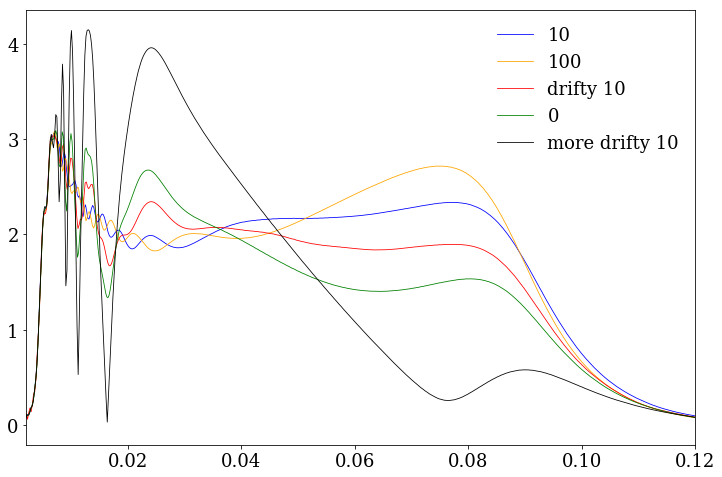

In [132]:
plt.figure(figsize=(12,8))
plt.plot(ylms_10.f[1:],np.abs(asyms_10),'b',label = "10")
plt.plot(ylms_100.f[1:],np.abs(asyms_100),'orange',label = "100")
plt.plot(ylms_10_drifty.f[1:],np.abs(asyms_10_drifty),'r',label="drifty 10")
plt.plot(ylms_0.f[1:],np.abs(asyms_0),'g',label="0")
plt.plot(ylms_10_more_drifty.f[1:],np.abs(asyms_10_moredrifty),'k',label = "more drifty 10")
plt.xlim(0.002,0.12)
plt.legend()

(-0.1, 0.1)

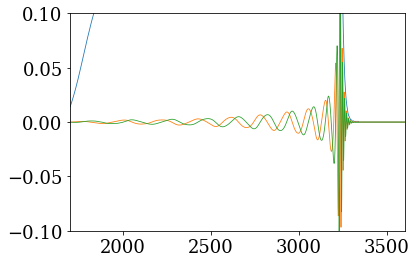

In [50]:
plt.plot(ylms_10.t,np.abs(ylms_10[2,2]['strain'].y+np.conj(ylms_10[2,-2]['strain'].y))/2)
plt.plot(ylms_10.t,np.real(ylms_10[2,2]['strain'].y-np.conj(ylms_10[2,-2]['strain'].y))/2)
plt.plot(ylms_10.t,np.imag(ylms_10[2,2]['strain'].y-np.conj(ylms_10[2,-2]['strain'].y))/2)
plt.xlim(1700,3600)
plt.ylim(-0.1,0.1)

In [52]:
from scipy.signal import hilbert 

In [196]:
original3 = (ylms_10[2,2]['strain'].y - np.conj(ylms_10[2,-2]['strain'].y))/2
original4 = (ylms_100[2,2]['strain'].y - np.conj(ylms_100[2,-2]['strain'].y))/2
original5 = (ylms_0[2,2]['strain'].y - np.conj(ylms_0[2,-2]['strain'].y))/2
original6 = (ylms_90[2,2]['strain'].y - np.conj(ylms_90[2,-2]['strain'].y))/2

In [197]:
transformed3= hilbert(np.abs(original3))
transformed4= hilbert(np.abs(original4))
transformed5= hilbert(np.abs(original5))
transformed6= hilbert(np.abs(original6))

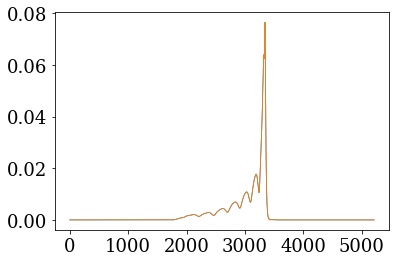

In [198]:
plt.plot(ylms_0.t,np.abs(original5))
plt.plot(ylms_0.t,transformed5)

(1500, 3500)

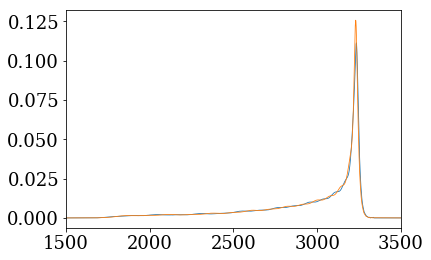

In [200]:
plt.plot(ylms_10.t,np.real(transformed3))
plt.plot(ylms_100.t-121,np.real(transformed4))
# plt.plot(ylms_0.t-105,np.abs(transformed5))
# plt.plot(ylms_90.t-200,np.abs(transformed6))
plt.xlim(1500,3500)

(1500, 3500)

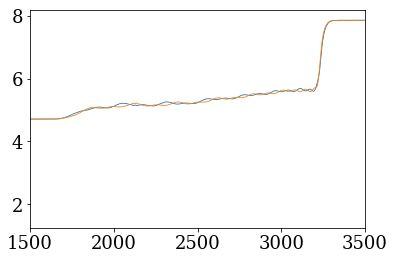

In [170]:
plt.plot(ylms_10.t,2*np.pi+np.unwrap(np.angle(transformed3)))
plt.plot(ylms_100.t-121,np.unwrap(np.angle(transformed4)))
# plt.plot(ylms_0.t-120,3.14+np.unwrap(np.angle(transformed5)))
# plt.plot(ylms_90.t-200,np.unwrap(np.angle(transformed6)))
plt.xlim(1500,3500)

In [201]:
phase_transformed3 = hilbert(np.angle(transformed3))
phase_transformed4 = hilbert(np.angle(transformed4))

/Users/shrobanaghosh/miniconda3/envs/test/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in power
  """Entry point for launching an IPython kernel.
/Users/shrobanaghosh/miniconda3/envs/test/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


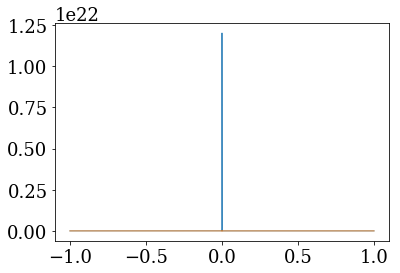

In [217]:
plt.plot(ylms_10.f,ylms_10.f**(-6))
plt.plot(ylms_10.f,ylms_10.f**(-2))
# plt.xlim(0.01,3000)
# plt.ylim(-10,10)

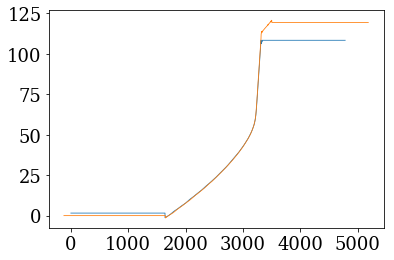

In [169]:
plt.plot(ylms_10.t,3.14/2+np.unwrap(np.angle(original3)))
plt.plot(ylms_100.t-121,np.unwrap(np.angle(original4)))

In [106]:
psi22 = np.loadtxt("/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/chinmay_precessingRuns/q1_a1m08_a2p08_RS_0/Psi4ModeDecomp/psi3col.r5.l5.l2.m2.gz")
psi2m2 = np.loadtxt("/Users/shrobanaghosh/mnt/NR_data/ReducedData-hogshead/chinmay_precessingRuns/q1_a1m08_a2p08_RS_0/Psi4ModeDecomp/psi3col.r5.l5.l2.m-2.gz")

In [109]:
asymmetry_superkick0 = np.abs( psi22[:,1] +1j*psi22[:,2])/2 - np.abs(np.conj ( psi2m2[:,1] - 1j*psi2m2[:,2] ) ) /2

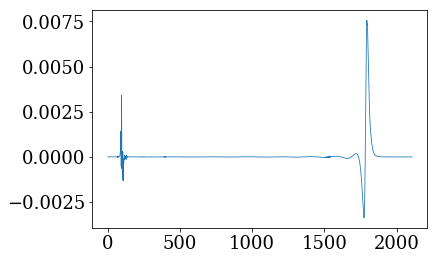

In [110]:
plt.plot(psi22[:,0],asymmetry_superkick0)

In [111]:
transformed_asymmetry_superkick0 = hilbert(asymmetry_superkick0)

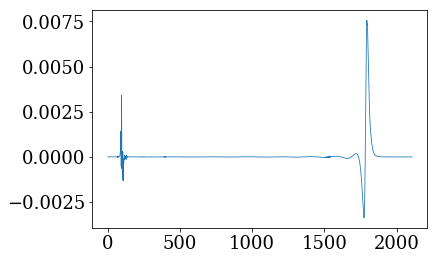

In [114]:
plt.plot(psi22[:,0],transformed_asymmetry_superkick0)